In [1]:
from cv2_v2 import *


fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'
clr=color_schema('yellow')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

In [4]:
from cv2_v2 import *
fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'

#fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/68653571067__FCF9D813-5942-4A11-BD7B-0F75D71F1F49.jpg'

img=cv2.imread(fn)#read file

clr=color_schema('green')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

imgray = cv2.cvtColor(value, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

v=cv2.drawContours(value, contours, -1, (0,255,0), 3)

font = cv2.FONT_HERSHEY_COMPLEX

# Going through every contours found in the image.
for cnt in contours :
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
  
    # draws boundary of contours.
    cv2.drawContours(value, [approx], 0, (0, 0, 255), 5) 
  
    # Used to flatted the array containing
    # the co-ordinates of the vertices.
    n = approx.ravel() 
    i = 0
  
    for j in n :
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]
  
            # String containing the co-ordinates.
            string = str(x) + " " + str(y) 
  
            if(i == 0):
                # text on topmost co-ordinate.
                cv2.putText(img, "Arrow tip", (x, y),
                                font, 0.5, (255, 0, 0)) 
            else:
                # text on remaining co-ordinates.
                #cv2.putText(img, string, (x, y), 
                          #font, 0.5, (0, 255, 0)) 
                pass
        i = i + 1

#new=img   

print(cv2)
        
moment_display(img)

#moment_display(new)

<module 'cv2' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cv2/__init__.py'>


0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


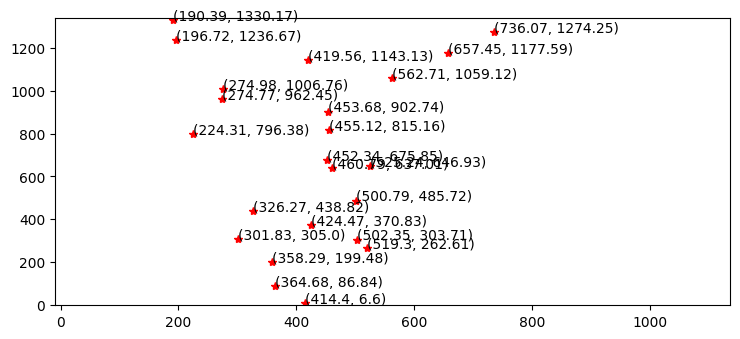

In [1]:
from cv2_v2 import *
#fn='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/rc_sample.jpg'

f='/Users/yassineacoine/Desktop/private/rock_climbing_path/data_set/sample/'
#image='245379234_4650402895027244_263010799927765806_n.jpeg'
image='rc_sample_3.jpeg'

fn=f+image
img=cv2.imread(fn)#read file

clr=color_schema('blue')
value=assisted_masking(path=fn,lower=clr[0],upper=clr[1])

img,coordinates=trace_pathx(path=fn,value=value)

centroids=find_centroids(coordinates)

simple_plot(centroids)




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


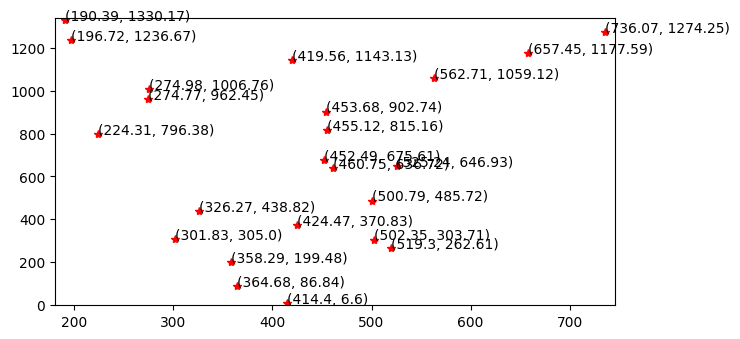

In [62]:
import pandas as pd
from sklearn.cluster import k_means

x=coordinates[::2] 
y=coordinates[1::2] 

data={'x':x, 'y':y}
df=pd.DataFrame(data)
centroids= k_means(df,n_clusters=23)[0] #round to 2 decimals from k means 
centroids = np.around(centroids,2)
#this might have to be manually supported 
#k-means uses euclidean distance, is this the best for geospatial clustering?
#look into below code later:
#df = pd.read_csv('gps.csv')
#coords = df.as_matrix(columns=['lat', 'lon'])
#db = DBSCAN(eps=eps, min_samples=ms, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

s=[item for sublist  in centroids.tolist() for item in sublist] #turning array of arrays into one list
#next is to plot with simple_plot
#s="%.2f" % s#round to 2 decim

simple_plot(s)

In [63]:
def find_centroids(coordinates):
    x=coordinates[::2] 
    y=coordinates[1::2] 

    data={'x':x, 'y':y}
    df=pd.DataFrame(data)
    centroids= k_means(df,n_clusters=23)[0] #round to 2 decimals from k means 
    centroids = np.around(centroids,2)
    #this might have to be manually supported 
    #k-means uses euclidean distance, is this the best for geospatial clustering?
    #look into below code later:
    #df = pd.read_csv('gps.csv')
    #coords = df.as_matrix(columns=['lat', 'lon'])
    #db = DBSCAN(eps=eps, min_samples=ms, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    
    #returned in one array, easily digestable for simple_plot()
    centroids_coordinates=[item for sublist  in centroids.tolist() for item in sublist]
    
    return centroids_coordinates